CESM2
GISS-E2-1-H


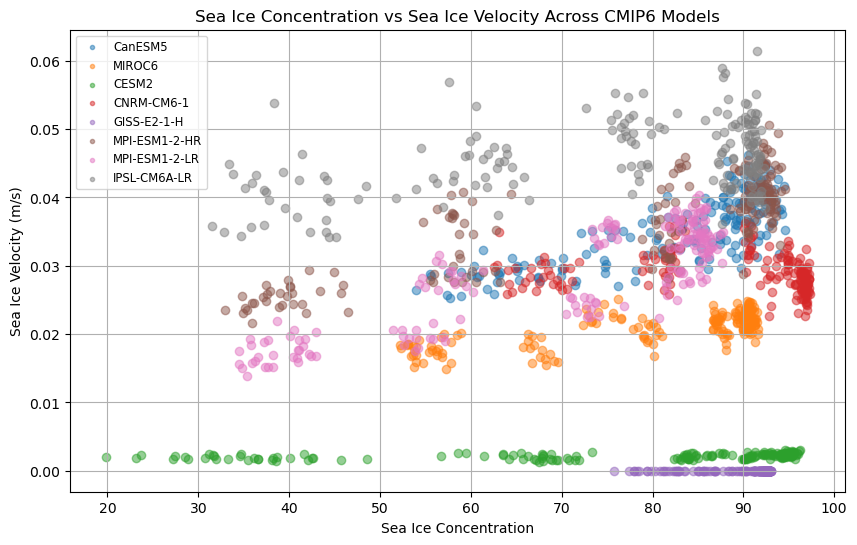

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

conc_folder = "siconc_data"
sea_ice_folder = "sea_ice_velocity_data"

conc_files = sorted(glob.glob(os.path.join(conc_folder, "*_siconc.csv")))
sea_ice_files = sorted(glob.glob(os.path.join(sea_ice_folder, "*_sivel.csv")))

conc_models = {os.path.basename(f).replace("_siconc.csv", ""): f for f in conc_files}
sea_ice_models = {os.path.basename(f).replace("_sivel.csv", ""): f for f in sea_ice_files}

# common models in both datasets
common_models = set(conc_models.keys()) & set(sea_ice_models.keys())
# print(common_models)

plt.figure(figsize=(10, 6))

for model in common_models:
    # load
    conc_df = pd.read_csv(conc_models[model], index_col="time", parse_dates=True)
    ice_df = pd.read_csv(sea_ice_models[model], index_col="time", parse_dates=True)

    # possible issue: seems like some wind dfs have different numbers of ensemble members
    # we should just average the ones that share all the same columns
    df = pd.merge(conc_df, ice_df, on="time")
    # instead of this merge step, you can do a step where if the columns are diff lengths,
    # then grab the columns shared by both
    
    conc_avg = conc_df.mean(axis=1)
    sea_ice_velocity_avg = ice_df.mean(axis=1)

    if sea_ice_velocity_avg.max() < 0.01:
        # sea_ice_velocity_avg *= 100
        print(model)
    # break

    plt.scatter(conc_avg, sea_ice_velocity_avg, alpha=0.5, label=model)

plt.xlabel("Sea Ice Concentration")
plt.ylabel("Sea Ice Velocity (m/s)")
plt.title("Sea Ice Concentration vs Sea Ice Velocity Across CMIP6 Models")
plt.legend(loc="best", fontsize="small", markerscale=0.5)
plt.grid(True)
plt.show()

In [41]:
print(os.listdir("siconc_data"))
print(os.listdir("sea_ice_velocity_data"))

['MRI-ESM2-0_siconc.csv', 'MIROC-ES2L_siconc.csv', 'INM-CM5-0_siconc.csv', 'CNRM-CM6-1_siconc.csv', 'IPSL-CM6A-LR_siconc.csv', 'CESM2_siconc.csv', 'MPI-ESM1-2-LR_siconc.csv', 'GISS-E2-1-H_siconc.csv', 'EC-Earth3_siconc.csv', 'CanESM5_siconc.csv', '.ipynb_checkpoints', 'MPI-ESM1-2-HR_siconc.csv', 'NorCPM1_siconc.csv', 'ACCESS-ESM1-5_siconc.csv', 'MIROC6_siconc.csv']
['MPI-ESM1-2-LR_sivel.csv', 'CESM2_sivel.csv', 'GISS-E2-1-H_sivel.csv', 'MPI-ESM1-2-HR_sivel.csv', 'CNRM-CM6-1_sivel.csv', 'CanESM5_sivel.csv', 'IPSL-CM6A-LR_sivel.csv', '.ipynb_checkpoints', 'GISS-E2-1-G_sivel.csv', 'MIROC6_sivel.csv']


In [35]:
print("Current directory:", os.getcwd())


Current directory: /Users/akikomotoki/Documents/Research/sea_ice_variability/Research
